# Simulating Earths Magnetic Field

## Introduction

In this notebook, we will simulate earths magnetic field. This simulation will be simplified. The simulation will be simplified by only simulating a solenoid and its magnetic field. The simplification takes into use the dynamo theory.

## Theory

Over the years, many theories have been proposed to explain how Earth magnetic field is formed. The oldest theory is about Earth itself being a gigantic magnet, and that the Earth as a magnet has remained alive well into modern times. This theory however has to be discarded, the reason for why it has been discarded is because of how the earth is builed up. Our planet, the Earth, is made up by three main layers; the crust, the mantle and the core. By our knowledge, Earth temperature increases with depth. It has to be said that the rate of increase is not linear. The temperature of the base of the crust is around 1000°C, and the temperature of inner core is estimated to be around 6000°C. Because of Earth temperature, any known material with a permantet magnetic field, would have lost its magnetism.

The theory that most likely is the reason for why Earth has a magnetic field, and how the magnetic field is maintained, is called the Dynamo theory. This theory is made up of several different natural phenomena and physical laws.

Earth's core, as mentioned earlier, is one of three layers that the earth is made up of. If we look closer at the earth's core, we can see that the core is also made up of different layer, or rather 2 layers. We have the solid inner core, and outer core which is a fluid. We are not completely sure, but research suggests that the Earth's outer core is made up of a mass that has electrically conductive abilities. 

It is thought that a dynamo process takes place in the Earth's core, simply explained that the mass of the Earth's outer core floats and flows in a source field, by flowing in a source field an electric current is generated. This electric current helps to maintain the earth's magnetic field. The magnetic field interacts with the mass current, which causes the current in the Earth's outer core to further strengthen the magnetic field. If we add all these mass currents affecting the magnetic field, it looks like solenoids are formed. A solenoid is a type of electromagnet, which is made up of a helix consisting of electrically conductive material, where the length of the solenoid is longer than the diameter.

In [2]:
q = 1.6e-19 #Set the charge of the particle to the charge of a proton
m = 1.67e-27 #Set mass of the particle to the mass of a proton

V = 50000 #Set voltage between the plates to 50000V
d = 90e-6 #Set the separation between the plates to 90 micrometers
E_0 = V / d #define the electric field based on voltage between the D's and separation

B = np.array([0, 0, 1.5]) #Set magnetic field to 1.5T in the +Z direction
r_cyclotron = 0.05 #set the radius of the D's to 5cm

Next, we define the cyclotron frequency, which is the frequency that determines when the electric field should switch to impart maximum speed to the particle. Assuming the gap between the D's is small, we can find this by setting the magnetic force equal to the expression for circular motion:

$$F = qvB = \frac{M v^2}{r}$$ $$r = \frac{mv}{qB}$$

And then substituting this expression into the expression for the time for one full rotation,

$$T = \frac{2 \pi r}{v} = \frac{2 \pi m}{qB}$$

Converting this into angular frequency ($\omega = \frac{v}{r}$), we end up with

$$\omega_{cyclotron}=\frac{qB}{m}$$

We define this frequency as a variable as well:

In [3]:
w = q * np.linalg.norm(B) / m #define the cyclotron frequency 

Now, we are ready to begin to simulate the motion of the proton, using a cyclotron function.

We will create numpy arrays for the particle's position and velocity. These will only ever hold three numbers (the x, y, and z positions/velocities of the particle). We initialize these to 0, so that the particle starts at the origin with 0 velocity. We will store the particle's positions in a list so that the last element of the list is the current position.

We also initialize the time, and set the timestep to 5 picoseconds. 

We use a while loop which runs while the magnitude of the proton's position is less than the radius of the cyclotron. For each itereation we create a vector (numpy array) that represents the force on the particle, then we use that to update the velocity, and we use that to update the position.

In [4]:
#loop while the magnitude of the proton's position remains within the cyclotron radius
def cyclotron(r_cyclotron, B, E_0, d, w, q, m):
    """Function to simulate a cyclotron, given its dimensions, fields, and a charged particle of mass m"""
    pos = np.array([0, 0, 0])
    vel = np.array([0, 0, 0])

    xList = [pos[0]] #We keep track of the x- and y-position for plotting
    yList = [pos[1]]
    
    t = 0 #initialize time to 0
    dt = 5e-12 #Set timestep to 5 picoseconds
    
    while (np.linalg.norm(pos) < r_cyclotron):

        if np.absolute(pos[0]) < d/2: #if the particle is between the two D's calculate the electric force
            Fnetx = q * E_0 * np.cos(w*t)
            Fnet = np.array([Fnetx, 0, 0])
        else: #if the particle is not, calculate the magnetic force
            Fnet = q * np.cross(vel, B)

        vel = vel + Fnet / m * dt #Update the velocity of the particle
        pos = pos + vel * dt #Use velocity to update the position of the particle

        xList.append(pos[0]) #Keep track of the x-coordinates
        yList.append(pos[1]) #Keep track of the y-coordinates

        t = t + dt #update the total time
    
    return t, xList, yList, vel, pos

In [5]:
t, xList, yList, vel, pos = cyclotron(r_cyclotron, B, E_0, d, w, q, m)

print(f"The final speed of the particle is {np.linalg.norm(vel):.0f} m/s")

The final speed of the particle is 6409853 m/s


Now, we will plot the resulting motion of the particle in 2D. We expect that it should have a spiral shape (for example, see http://hyperphysics.phy-astr.gsu.edu/hbase/magnetic/cyclot.html)

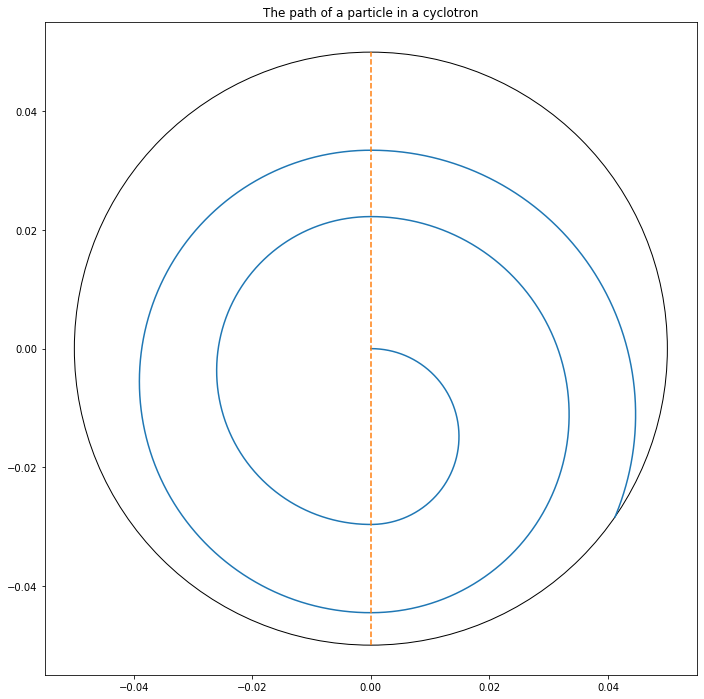

In [6]:
plt.figure(figsize=(12,12)) #Create the figure
plt.plot(xList, yList) #Create the plot with the x and y components of the position

plt.plot([d,d],[-r_cyclotron, r_cyclotron], linestyle="--") #Plot the line where the electric field is
c = plt.Circle([0,0], r_cyclotron, fill=False) #Plot the edge of the cyclotron
ax=plt.gca()
ax.add_patch(c)

plt.axis('scaled')
plt.title("The path of a particle in a cyclotron")
plt.show()

## Additional questions you might investigate

1. In real life, cyclotrons are used for treating cancer. How much voltage would you need to achieve the energy to destroy a cancer cell? (about 100-250 MeV, according to *Goitein, M., Lomax, A. J., & Pedroni, E. S. (2002). Treating cancer with protons. Physics Today, 55(9), 45–50. http://doi.org/10.1063/1.1522215*)
    * Or, what size of cyclotron would you need at a given voltage?
2. These particles can quickly start to approach the speed of light. How does this result change with the addition of relativistic factors?
3. Particle accelerators have been proposed as a possible method of disposing of spent nuclear fuel, as described here: https://www.symmetrymagazine.org/article/february-2012/taking-the-heat-out-of-nuclear-waste Could a cyclotron be used for this type of application?
4. What happens if you use a different kind of pulse, like a square wave instead of a sin wave? What if you alter the phase of the wave? 
5. What happens if you want to produce a stream of particles instead of just one? What if you use electrons instead of protons?

*(Note that these are just meant to be suggestions—feel free to investigate any question you find interesting!)*